In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("global_student_migration.csv")

In [4]:
print("Shape : ",df.shape)
# 5000 rows and 20 columns

Shape :  (5000, 20)


In [5]:
df.head(5)

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [7]:
df.isnull().sum()

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [8]:
df.describe()
#description of numerical columns 

,year_of_enrollment,graduation_year,starting_salary_usd,gpa_or_score,test_score
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2021.011000,2023.017800,44552.531000,3.246820,5.632200
std,1.420733,1.651432,50719.190623,0.430659,2.973838
min,2019.000000,2020.000000,0.000000,2.500000,0.000000
25%,2020.000000,2022.000000,0.000000,2.877500,5.300000
50%,2021.000000,2023.000000,30516.500000,3.240000,6.500000
75%,2022.000000,2024.000000,87838.500000,3.610000,7.800000
max,2023.000000,2026.000000,149932.000000,4.000000,9.000000


In [9]:
print("Unique counts in categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()}")

Unique counts in categorical columns:
student_id: 5000
origin_country: 10
destination_country: 10
destination_city: 51
university_name: 74
course_name: 15
field_of_study: 8
scholarship_received: 2
enrollment_reason: 5
placement_status: 2
placement_country: 10
placement_company: 13
visa_status: 6
post_graduation_visa: 5
language_proficiency_test: 4


## Univariate Analysis

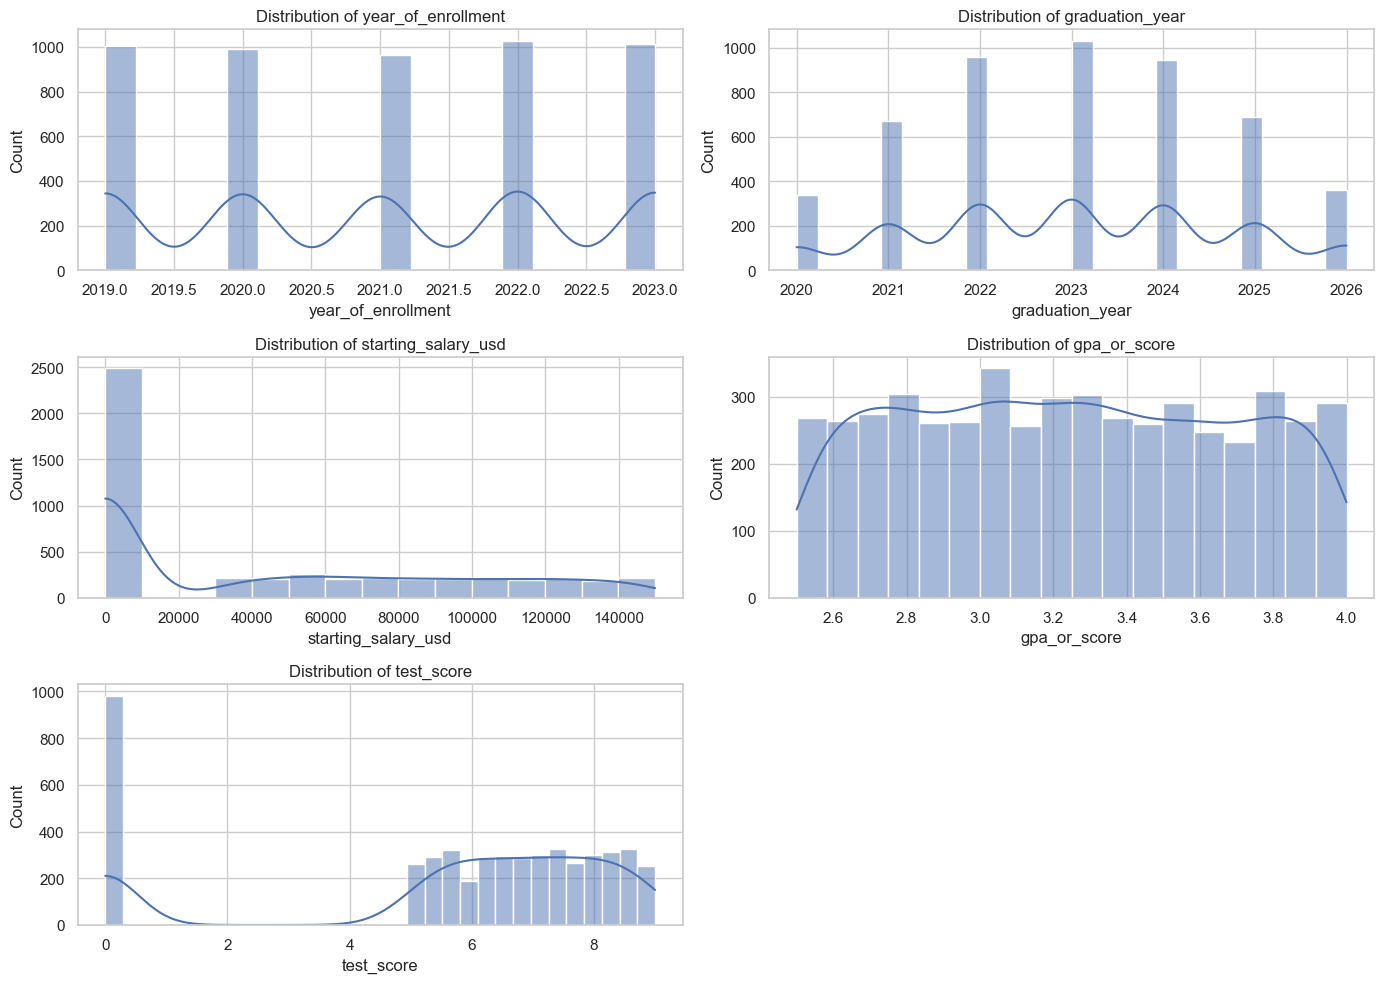

In [10]:
sns.set(style="whitegrid")

num_cols=['year_of_enrollment', 'graduation_year', 'starting_salary_usd', 'gpa_or_score', 'test_score']

#Analysis for numerical columns
plt.figure(figsize=(14,10))
for i,col in enumerate(num_cols,1):
    plt.subplot((len(num_cols)+1)//2,2,i)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

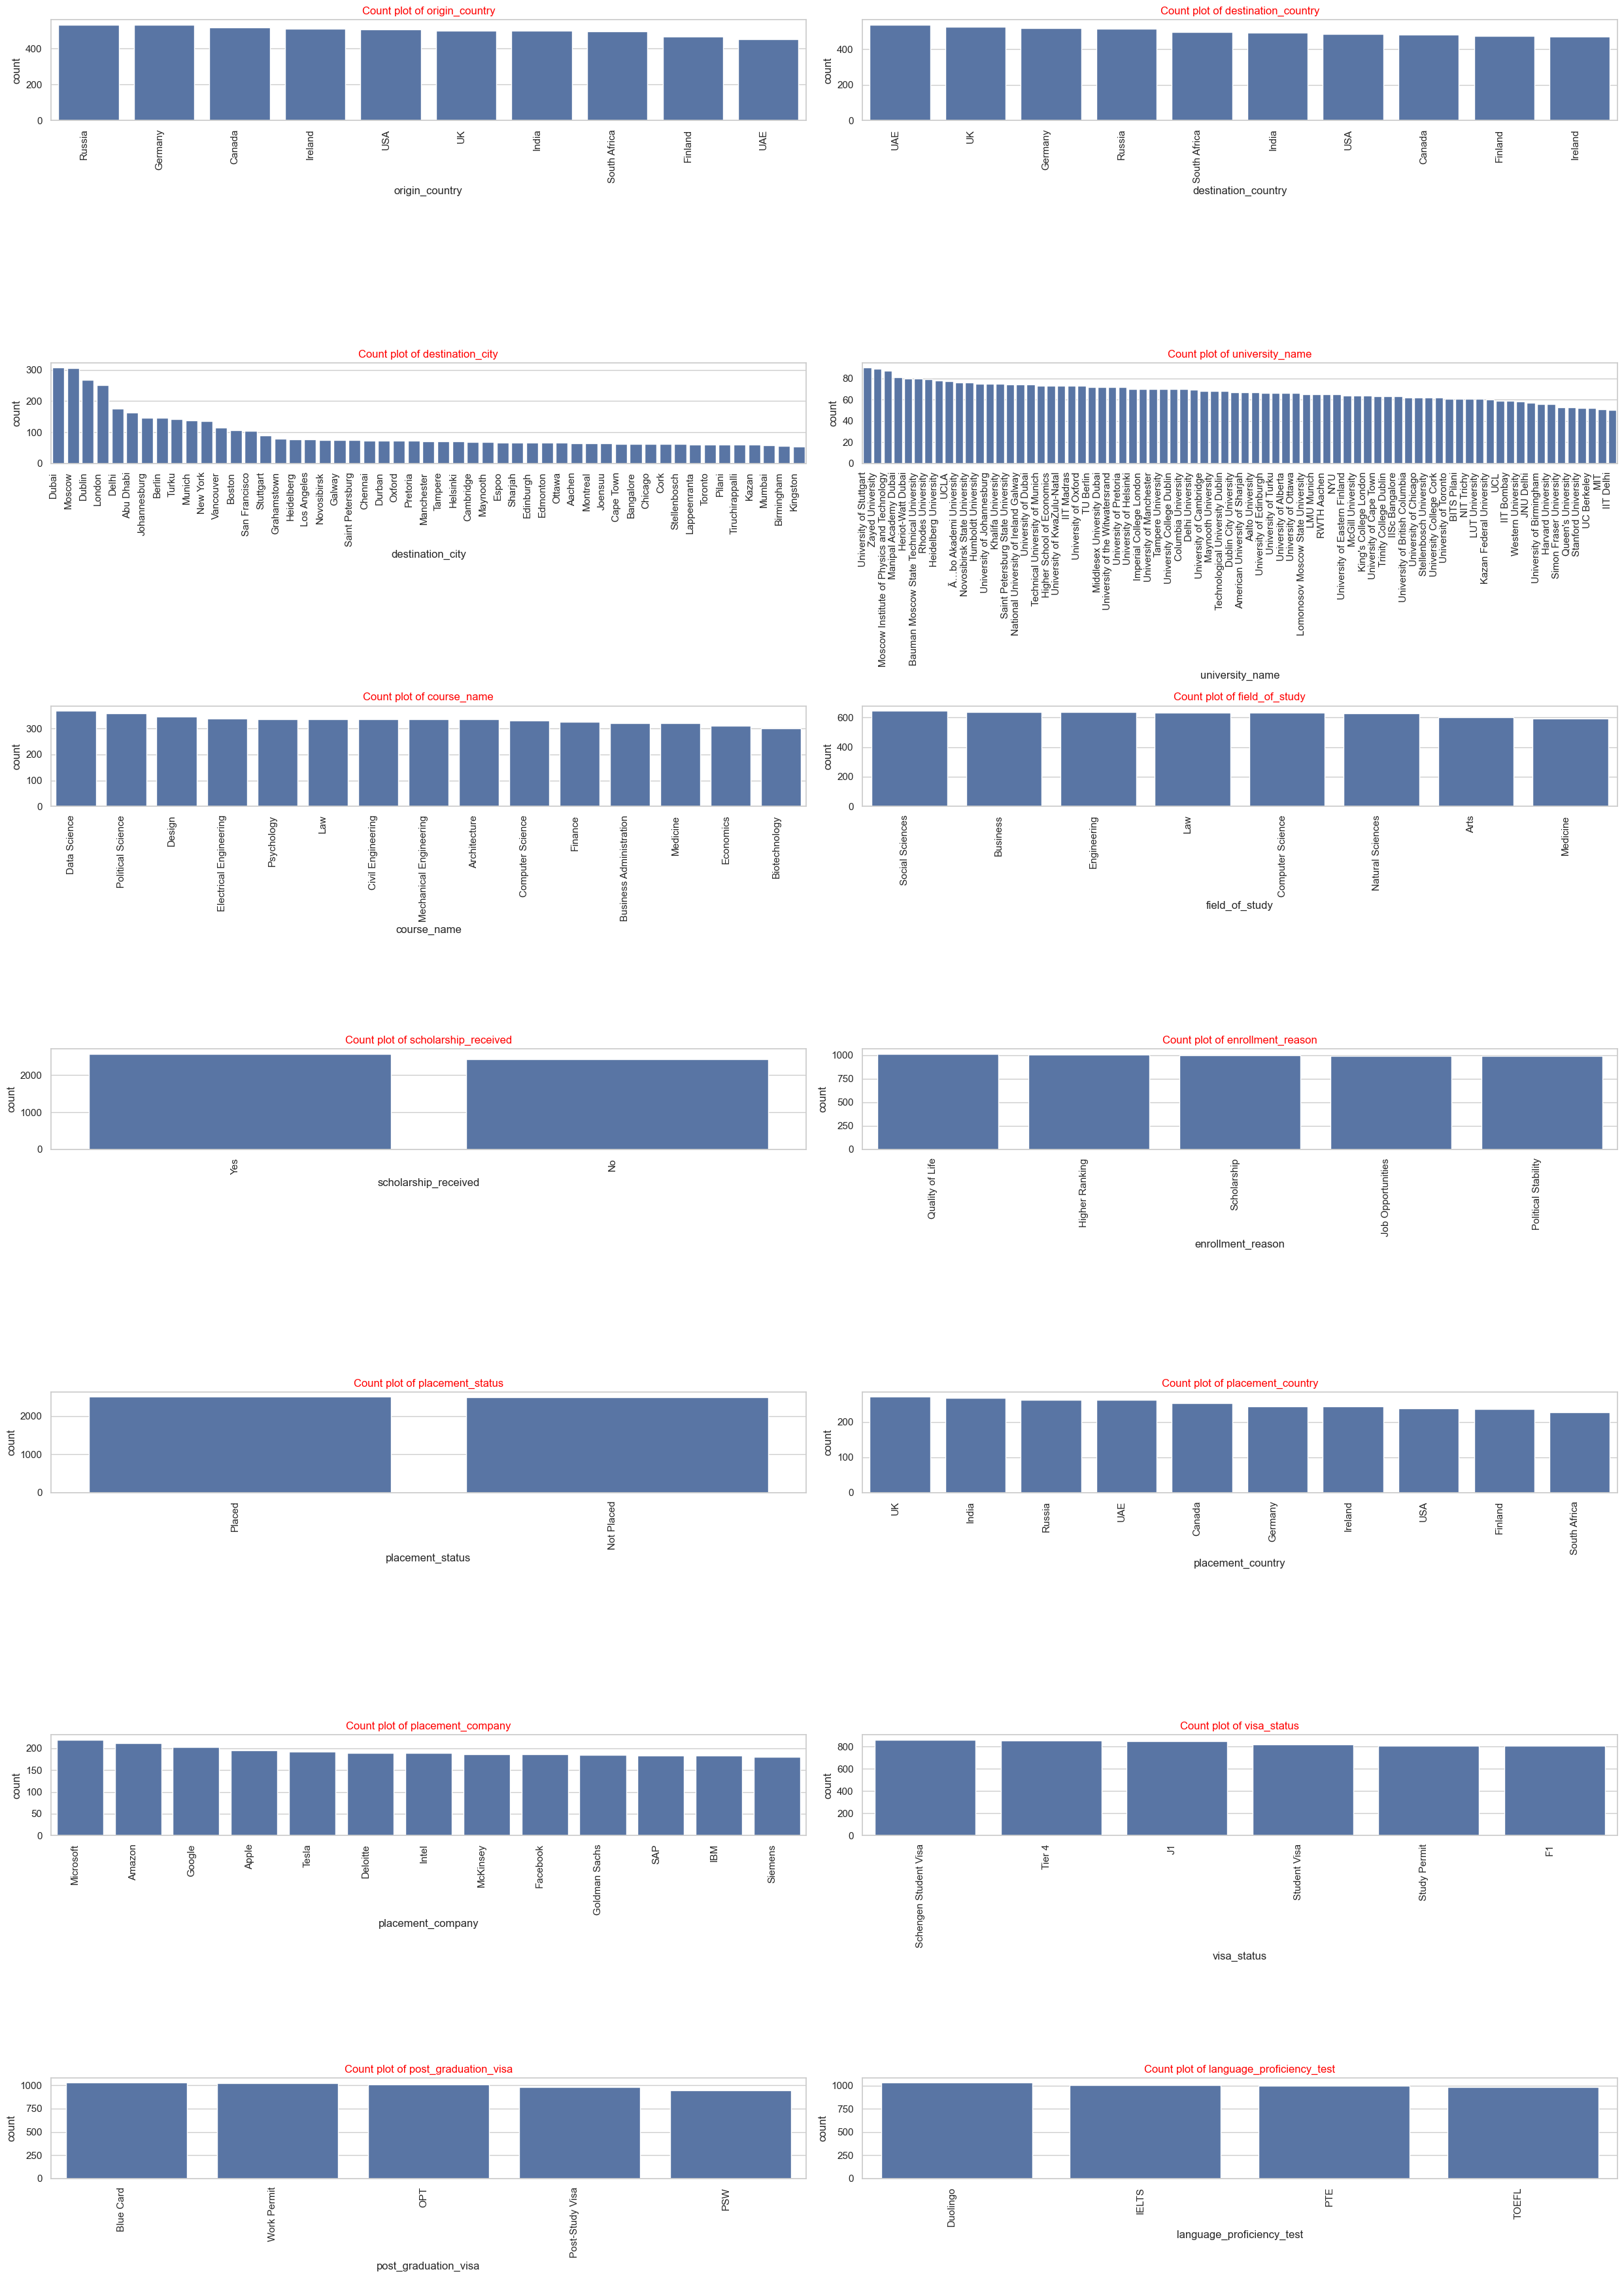

In [11]:
cat_cols=['origin_country', 'destination_country', 'destination_city', 'university_name',
            'course_name', 'field_of_study', 'scholarship_received', 'enrollment_reason',
            'placement_status', 'placement_country', 'placement_company',
            'visa_status', 'post_graduation_visa', 'language_proficiency_test']
#Analysis for categorical columns
n= len(cat_cols)
plt.figure(figsize=(25,n*2.5))
for i,col in enumerate(cat_cols,1):
    plt.subplot((n+1)//2,2,i)
    sns.countplot(data=df,x=col,order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}',color='red')
    plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

## Bi-variate analysis

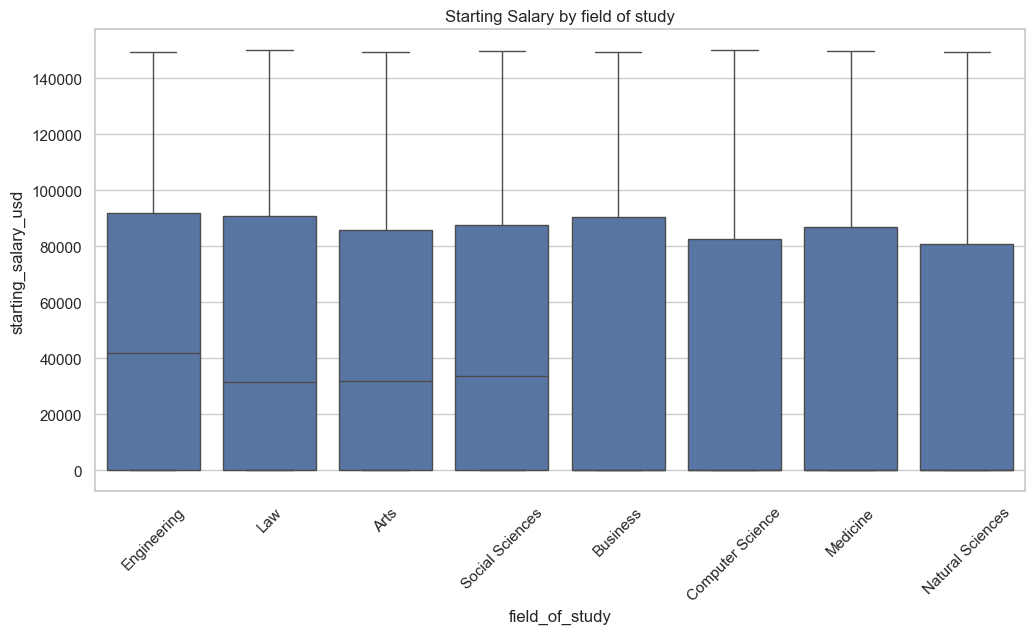

In [12]:
# Starting salary vs field of study
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='field_of_study',y='starting_salary_usd')
plt.title('Starting Salary by field of study')
plt.xticks(rotation = 45)
plt.show()

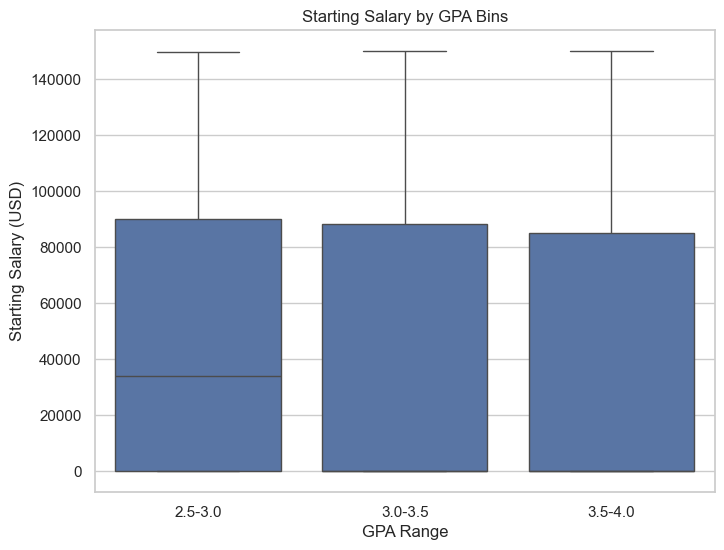

In [13]:

# 2. Starting Salary vs GPA
df['gpa_bin'] = pd.cut(df['gpa_or_score'], bins=[2.5, 3.0, 3.5, 4.0], labels=['2.5-3.0', '3.0-3.5', '3.5-4.0'])

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gpa_bin', y='starting_salary_usd')
plt.title('Starting Salary by GPA Bins')
plt.xlabel('GPA Range')
plt.ylabel('Starting Salary (USD)')
plt.show()

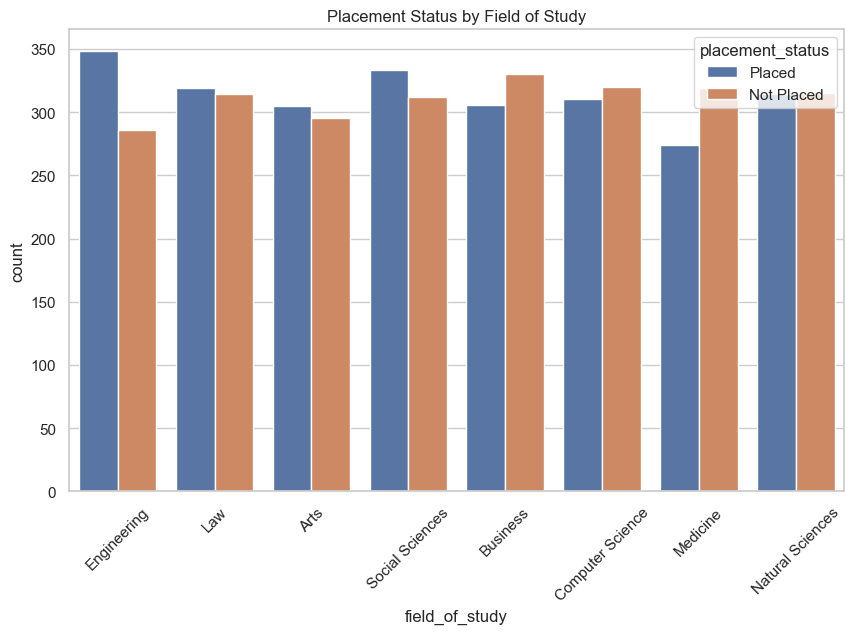

In [14]:
# 3. Placement Status vs Field of Study
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='field_of_study', hue='placement_status')
plt.title('Placement Status by Field of Study')
plt.xticks(rotation=45)
plt.show()

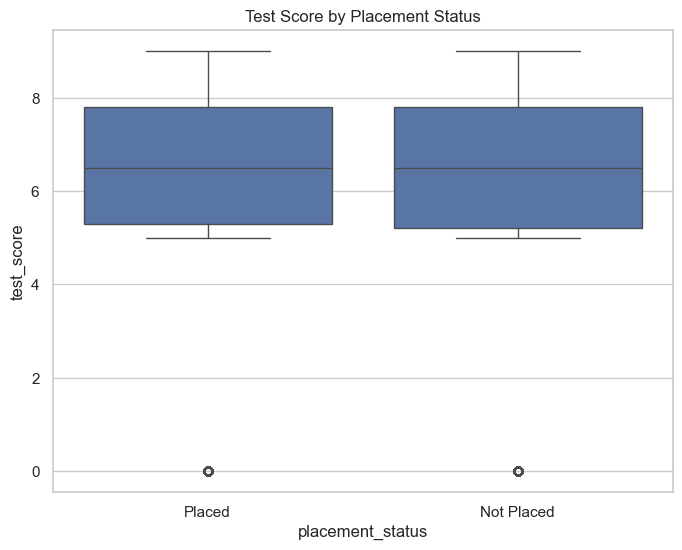

In [15]:
# 4. Test Score vs Placement Status
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='placement_status', y='test_score')
plt.title('Test Score by Placement Status')
plt.show()

C:\Users\rezwa\AppData\Local\Temp\ipykernel_24184\916524500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='placement_status', y='gpa_or_score', palette=palette)


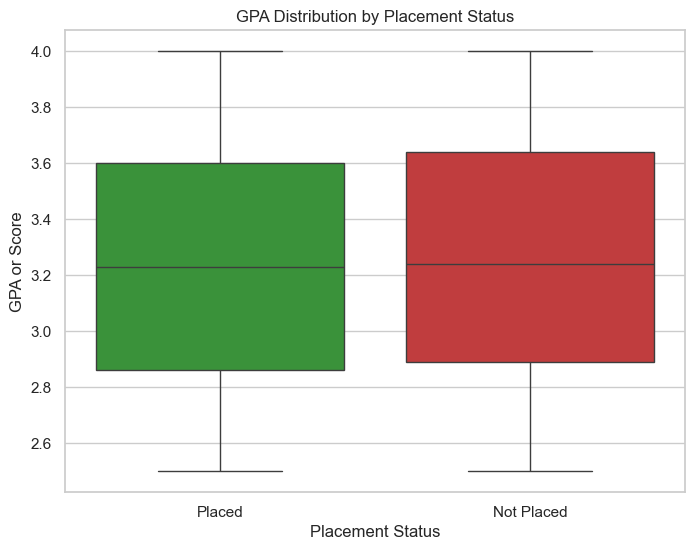

In [16]:
# 5. GPA vs Placement Status

plt.figure(figsize=(8,6))
palette = {'Placed':'#2ca02c', 'Not Placed':'#d62728'}  # green for placed, red for not placed

sns.boxplot(data=df, x='placement_status', y='gpa_or_score', palette=palette)

plt.title('GPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('GPA or Score')
plt.show()

C:\Users\rezwa\AppData\Local\Temp\ipykernel_24184\197744659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


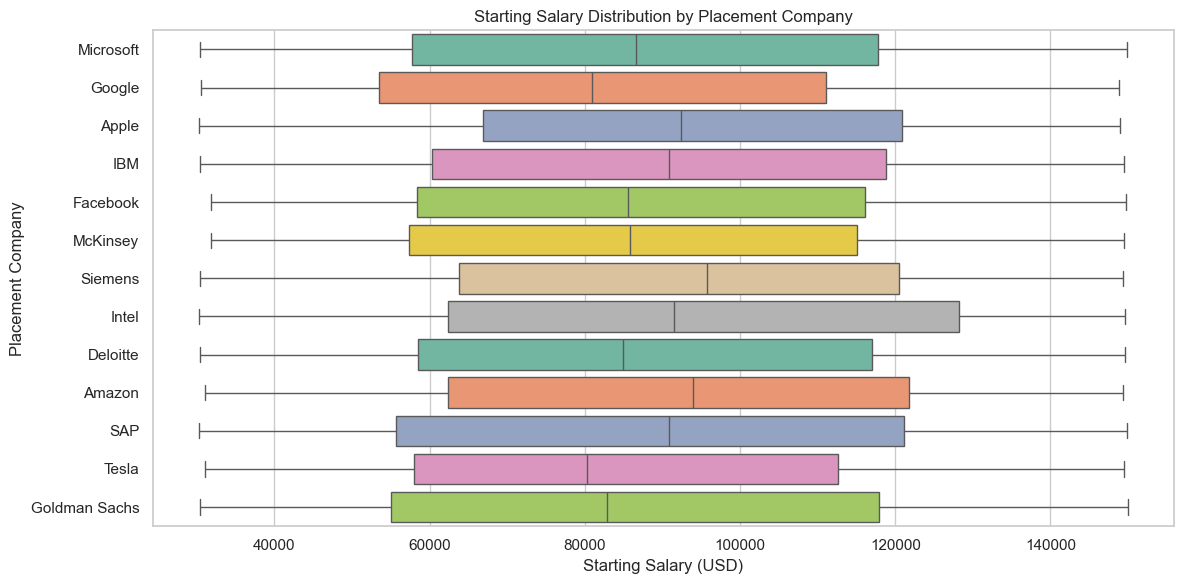

In [17]:
# Filter out companies with zero salary if needed
salary_companies = df[df['starting_salary_usd'] > 0]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=salary_companies,
    x='starting_salary_usd',
    y='placement_company',
    palette='Set2'
)
plt.title('Starting Salary Distribution by Placement Company')
plt.xlabel('Starting Salary (USD)')
plt.ylabel('Placement Company')
plt.tight_layout()
plt.show()

 ## Correlation Analysis

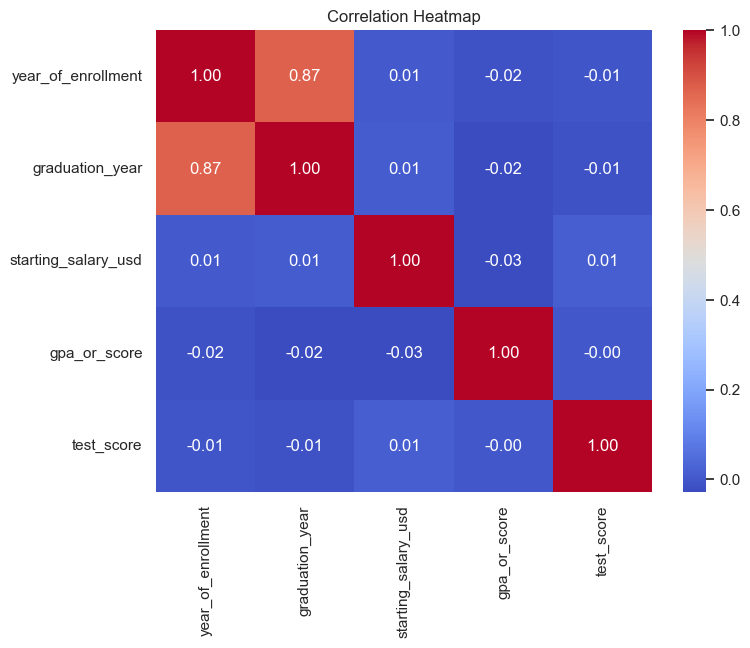

In [18]:
num_cols = ['year_of_enrollment', 'graduation_year', 'starting_salary_usd', 'gpa_or_score', 'test_score']
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Migration flow analysis

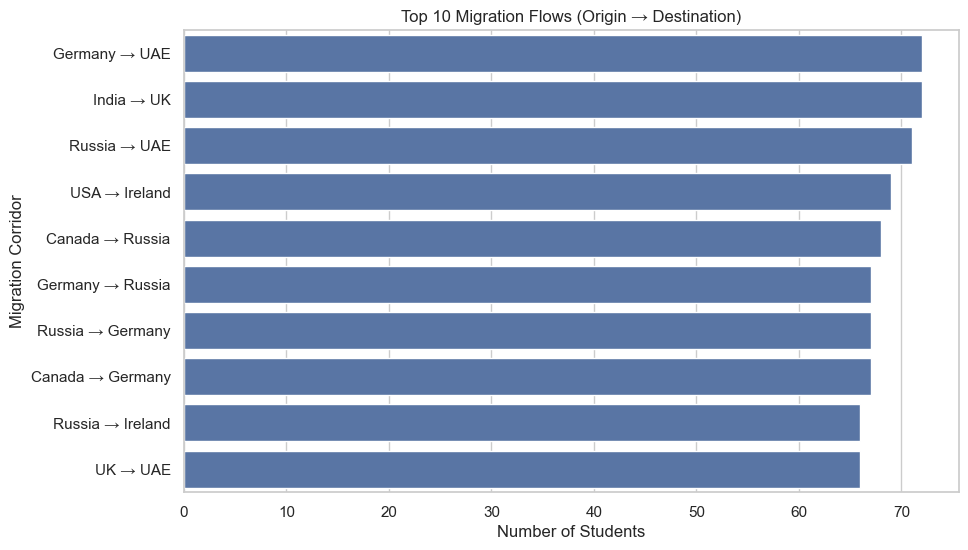

In [23]:
migration_flow = df.groupby(['origin_country', 'destination_country']).size().reset_index(name='count')
migration_flow = migration_flow.sort_values('count', ascending=False)

top_mig_flows = migration_flow.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_mig_flows, x='count', y=top_mig_flows['origin_country'] + " → " + top_mig_flows['destination_country'])
plt.title("Top 10 Migration Flows (Origin → Destination)")
plt.xlabel("Number of Students")
plt.ylabel("Migration Corridor")
plt.show()

## Model Building -> Predict whether a student will be placed or not

In [24]:
features = ['origin_country', 'field_of_study',
            'gpa_or_score', 'test_score', 'scholarship_received', 'visa_status', 'university_name', 'course_name']

X = df[features]
y = df['placement_status']

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])

le_y=LabelEncoder()
y=le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic regression

Logistic Regression Accuracy: 50.3000

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.57      0.52       475
           1       0.53      0.44      0.48       525

    accuracy                           0.50      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.50      0.50      1000



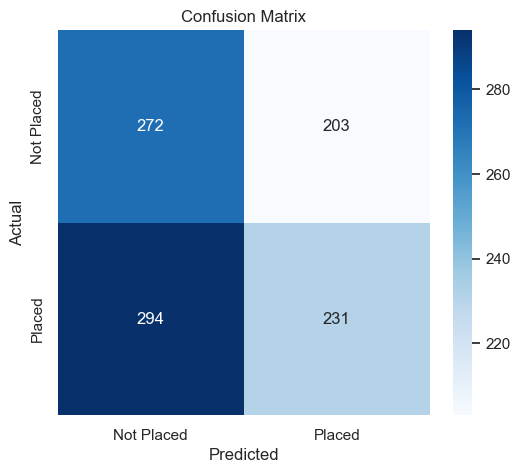

In [25]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train,y_train)

y_pred=lg.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test,y_pred)*100
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

 Random Forest Accuracy: 49.2000

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       475
           1       0.52      0.50      0.51       525

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



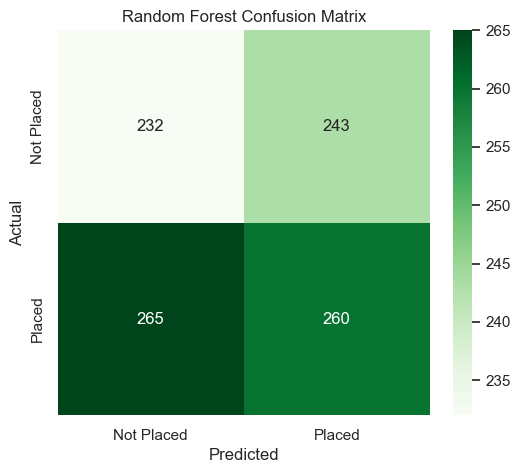

In [26]:
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
# if estimators numbers are increased the accuracy also increased but it takes time
rf.fit(X_train,y_train)

rf_pred=rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)*100
print(f" Random Forest Accuracy: {rf_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le_y.classes_, yticklabels=le_y.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()